本节为《高等数值分析》大作业

本文用到python的sympy库进行符号运算，
可以到第一章进行了解。

原创内容,如需转载需征得作者同意。

Copyright©2020 lizhemin
***

题目一：利用Romberg求积计算积分$\int_2^5\frac{10}{x^2} \sin\frac{10}{x}dx$，使误差不超过$10^{-4}$.

**分析**：直接使用Romberg算法计算即可，误差使用迭代项误差$T_k^{(0)}-T_{k-1}^{(0)}$控制。

算法步骤如下：
1. 计算$T_0^{(0)}=\frac{b-a}{2}[f(a)+f(b)]$且令$1\rightarrow k$(k记录二分的次数)
2. 求梯形值，$T_{2 n}=\frac{1}{2} T_{n}+\frac{h}{2} \sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right)$计算$T_0^{(k)}$
3. 求加速值，$T_{m}^{(k)}=\frac{4^{m}}{4^{m}-1} T_{m-1}^{(k+1)}-\frac{1}{4^{m}-1} T_{m-1}^{(k)} \quad(k=1,2, \cdots)$逐个求出T数表第$k+1$行其余各元素$T_j^{(k-j)}(j=1,2,\ldots,k)$
4. 精度控制。对于指定精度$\varepsilon$，若$|T_k^{(0)}-T_{k-1}^{(0)}|<\varepsilon$，则终止计算，并取$T_k^{(0)}$作为所求的结果；否则令$k+1\rightarrow k$(意为二分一次)，转步2继续计算。


In [53]:
import sympy as sp
import numpy as np
import copy


def trap(f,xi):
    #use compound trapezoid quadrature formula
    int_sum = 0
    for i in range(len(xi)-1):
        fa = f.evalf(subs={x:xi[i]})
        fb = f.evalf(subs={x:xi[i+1]})
        int_sum += (xi[i+1]-xi[i])*(fa+fb)/2
    return int_sum
def romberg(f,a,b,error):
    #input function:"f",interval:"[a,b]" and error:"error"
    #for example, if we want to calculate \int_{-1}^1 x dx, we can input romberg(f=\int_{-1}^1 x dx,(a,b)=(-1,1),error)
    #then we will return a float reuslt
    k = 1
    while k==1 or abs(T1[-1]-T0[-1])>error:
        if k!=1:
            T0 = copy.copy(T1)#Python will share RAM if we do not use 'copy'
        else:
            T0 = []
            xi = np.linspace(a,b,2**k)
            T0.append(trap(f,xi))
        print(T0)
        k += 1
        T1 = []
        xi = np.linspace(a,b,2**k)
        T1.append(trap(f,xi))
        for m in range(k-1):
            m += 1
            t_new = 4**m/(4**m-1)*T1[m-1]-T0[m-1]/(4**m-1)
            T1.append(t_new)
    return T1[-1]
    
x = sp.Symbol('x')
f = 10/x**2*sp.sin(10/x)
#sp.pprint(f)
print(f)
print(romberg(f,2,5,1e-4))

10*sin(10/x)/x**2
[-3.05038757389136]
[-0.854492948871575, -0.122528073864980]
[-0.714585953216935, -0.667950287998721, -0.704311768940971]
[-0.702347789064260, -0.698268401013368, -0.700289608547678, -0.700225764731911]
[-0.700368605040348, -0.699708877032377, -0.699804908766977, -0.699797215119665, -0.699795534532950]
-0.699806720594405


***
题目二：对函数$f(x)=\frac{1}{1+15x^2}$构造插值函数，插值区间为$[-1,1]$，给定节点为$x_j=-1+jh,h=\frac{2}{n},j=0,1,\ldots,n$。分别利用Lagrange插值(n=10)，分段线性插值(n=10)，三次样条插值(n=10)，给出相应的函数曲线和数据表，并分析误差及成因。

# **分析**：
## 拉格朗日插值法
拉格朗日法公式：$L_{n}(x)=\sum_{k=0}^{n}-\frac{w_{n}(x)}{\left(x-x_{n}\right) w^{\prime}_{n}\left(x_{k}\right)} f\left(x_{k}\right)$其中$w_{n}(x)=\left(x-x_{0}\right)\left(x-x_{1}\right) \dots\left(x-x_{n}\right)$

阶段误差$R_{n}(x)=f(x)-p(x)=\frac{f^{(n+1)}(\xi)}{(n+1) !} w_{n}(x), \quad \xi \in(a, b)$
## 分段线性插值
难度不大，直接把相邻插值点通过线性线段连接
## 三次样条插值
使用三弯矩算法进行计算

Original:
0.0625
0.07050399339025062
0.08010012515644556
0.09172339663203152
0.10596026490066225
0.12361178174794785
0.14578587699316628
0.17403127124405166
0.21052631578947367
0.25832492431886983
0.32160804020100503
0.40570522979397783
0.5161290322580645
0.6547314578005115
0.810126582278481
0.9446494464944649
1.0
0.9446494464944649
0.810126582278481
0.6547314578005115
0.5161290322580645
0.40570522979397783
0.32160804020100503
0.25832492431886983
0.21052631578947367
0.17403127124405166
0.14578587699316628
0.12361178174794785
0.10596026490066225
0.09172339663203152
0.08010012515644556
0.07050399339025062
0.0625
Lagrange:
0.06249999999047423
1.1527064267254425
0.7009742222192631
0.16621247801990555
-0.06005130769803599
-0.02794434939896053
0.10445830191606228
0.21832346967935418
0.2722710838567012
0.28606245126922286
0.305594462334414
0.37043413001443215
0.4941410370445463
0.6598216967026771
0.8283150766811807
0.9536981612434949
1.0
0.9536977785284932
0.8283146129040595
0.659821583199874

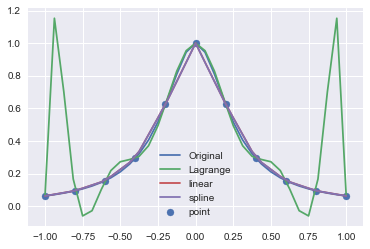

x:
-1.0
-0.9375
-0.875
-0.8125
-0.75
-0.6875
-0.625
-0.5625
-0.5
-0.4375
-0.375
-0.3125
-0.25
-0.1875
-0.125
-0.0625
0.0
0.0625
0.125
0.1875
0.25
0.3125
0.375
0.4375
0.5
0.5625
0.625
0.6875
0.75
0.8125
0.875
0.9375
1.0


In [61]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def lagrange(f,xi,fi,n):
    N = n+1
    L = 0
    for i in range(N):
        w = 1
        for j in range(N):
            w *= (x-xi[j])
        wd = sp.diff(w,x)
        wd = wd.evalf(subs={x:xi[i]})
        L_now = w/(x-xi[i])/wd * fi[i]
        L += L_now
    return sp.simplify(L)

def linear(xi,fi,x_in):
    # suppose that xi from little to big
    y = np.zeros(x_in.shape)
    for i in range(x_in.shape[0]):
        for j in range(xi.shape[0]):
            if x_in[i]<=xi[j]:
                index_now = j
                break
        if x_in[i] == xi[0]:
            index_now = 1
        #print(index_now)
        y[i] = (x_in[i]-xi[index_now-1])*(fi[index_now]-fi[index_now-1])/(xi[index_now]-xi[index_now-1])+fi[index_now-1]
    return y

def spline(f,xi,x_plot):
    #plot spline
    def dq(f):
        #input with shape of (N,2), numpy array.
        #output a polynominal of interpotation
        N = f.shape[0]
        #sort datas from low to high
        argsort = f[:,0].argsort(axis=0)
        f = f[argsort]
        xi = f[:,0]
        #calculate differential quation
        dtab = np.zeros((N,N))
        dtab[:,0] = f[:,1]
        for col in range(1,N):
            for row in range(col,N):
                dtab[row,col] = (dtab[row,col-1]-dtab[row-1,col-1])/(xi[row]-xi[row-col])
        return xi,dtab

    def thrs(f=None,cond=None,cond_in=(1,2)):
        xi,dtab = dq(f)
        N = dtab.shape[0]
        vec_lambda = np.zeros((N,1))
        vec_mu = np.zeros((N,1))
        vec_d = np.zeros((N,1))
        #step 2
        vec_h = np.diff(xi,axis=0)
        #step 3
        for i in range(1,N-1):
            vec_mu[i] = vec_h[i-1]/(vec_h[i-1]+vec_h[i])
            vec_lambda[i] = 1-vec_mu[i]
            vec_d[i] = 6*dtab[i+1,2]
        #border condition
        if cond == 1:
            vec_mu[0] = 0
            vec_mu[N-1] = 1
            vec_lambda[0] = 1
            vec_lambda[N-1] = 0
            vec_d[0] = 6/vec_h[0]*(dtab[1,1]-cond_in[0])
            vec_d[N-1] = 6/vec_h[N-2]*(cond_in[1]-dtab[N-1,1])
        elif cond == 2:
            vec_mu[0] = 1
            vec_mu[N-1] = 0
            vec_lambda[0] = 0
            vec_lambda[N-1] = 1
            vec_d[0] = 2*cond_in[0]
            vec_d[N-1] = 2*cond_in[1]
        elif cond==3:
            raise('wait for me')
            vec_mu[0] = 0
            vec_mu[N-1] = 1-vec_h[0]/(vec_h[N-2]+vec_h[0])
            vec_lambda[0] = 0
            vec_lambda[N-1] = vec_h[0]/(vec_h[N-2]+vec_h[0])
            vec_d[0] = 2*cond_in[0]
            vec_d[N-1] = 2*cond_in[1]
        else:
            raise('wrong cond')
        #Chase
        return chase(a=vec_mu, b=np.ones((N,1))*2, c=vec_lambda, f=f[:,1])
        print('mu:',vec_mu,'\r lambda:',vec_lambda,'\r d:',vec_d)


    def chase(a,b,c,f):
        #shape of a,b,c,f are [n,1]
        n = a.shape[0]
        #step 1
        vec_beta = np.zeros((n-1,1))    
        vec_beta[0] = c[0]/b[0]
        for i in range(1,n-1):
            vec_beta[i] = c[i]/(b[i]-a[i]*vec_beta[i-1])
        #step 2
        y = np.zeros((n,1))
        y[0] = f[0]/b[0]
        for i in range(1,n):
            y[i] = (f[i]-a[i]*y[i-1])/(b[i]-a[i]*vec_beta[i-1])
        #step 3
        x = np.zeros((n,1))
        x[n-1] = y[n-1]
        for i in range(n-2,-1,-1):
            x[i] = y[i]-vec_beta[i]*x[i+1]
        return x

    def get_seg(xi,M,f,x_in):
        # suppose that xi from little to big
        h = np.diff(xi,axis=0)
        y = np.zeros(x_in.shape)
        for i in range(x_in.shape[0]):
            for j in range(xi.shape[0]):
                if x_in[i]<=xi[j]:
                    index_now = j
                    break
            if x_in[i] == xi[0]:
                index_now = 1
            #print(index_now)
            #print(M[index_now-1],xi[index_now],x_in[i],h[index_now-1])
            c1 = M[index_now-1]*(xi[index_now]-x_in[i])**3/6/h[index_now-1]
            c2 = M[index_now]*(x_in[i]-xi[index_now-1])**3/6/h[index_now-1]
            c3 = (f[index_now-1]-M[index_now-1]*h[index_now-1]**2/6)*(xi[index_now]-x_in[i])/h[index_now-1]
            c4 = -(f[index_now]-M[index_now]*h[index_now-1]**2/6)*(xi[index_now-1]-x_in[i])/h[index_now-1]
            y[i] = c1+c2+c3+c4
        return y
    xi = xi.reshape(-1,1)
    fi = np.zeros(xi.shape)
    for i in range(n+1):
        fi[i] = f.evalf(subs={x:xi[i]})
    f_in = np.concatenate([xi,fi],axis=1)
    print(f_in)
    f_diff = sp.diff(f,x,1)
    cond_1 = f_diff.evalf(subs={x:-1})
    cond_2 = f_diff.evalf(subs={x:1})
    M = thrs(f_in,cond=1,cond_in=(cond_1,cond_2))
    #print(M)
    return np.squeeze(get_seg(xi,M,fi,x_in=x_plot))

def f_plot(f,xi,name):
    N = xi.shape[0]
    yi = np.zeros(xi.shape)
    for i in range(N):
        yi[i] = float(f.evalf(subs={x:xi[i]}))
    yi = np.array(yi)
    my_print(name+':',yi)
    plt.plot(xi,yi,label=name)

def my_print(name,y):
    print(name)
    for i in range(y.shape[0]):
        print(y[i])

x = sp.Symbol('x')
f = 1/(1+15*x**2)
n = 10
xi = np.linspace(-1,1,n+1)
fi = np.zeros(xi.shape)
for i in range(n+1):
    fi[i] = f.evalf(subs={x:xi[i]})
l = lagrange(f,xi,fi,n)
#print(fi)
#print('lagrange:')
#sp.pprint(l)
x_plot = np.linspace(-1,1,(n+1)*3)
plt.scatter(xi,fi,label='point')
f_plot(f,x_plot,name='Original')
f_plot(l,x_plot,name='Lagrange')
y_linear = linear(xi,fi,x_plot)
my_print('linear:',y_linear)
plt.plot(x_plot,y_linear,label='linear')
y_spline = spline(f,xi,x_plot)
plt.plot(x_plot,y_spline,label='spline')
my_print('spline:',y_spline)
plt.legend()
plt.savefig('insert.eps')
plt.show()
my_print('x:',x_plot)